#### 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('NYC_Dog_Licensing_Dataset_20250210.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 8
  AnimalName AnimalGender AnimalBirthYear BreedName    ZipCode LicenseIssuedDate
  <chr>      <chr>                  <dbl> <chr>          <dbl> <chr>            
1 PAIGE      F                       2014 American Pi…   10035 09/12/2014       
2 YOGI       M                       2010 Boxer          10465 09/12/2014       
3 ALI        M                       2014 Basenji        10013 09/12/2014       
4 QUEEN      F                       2013 Akita Cross…   10013 09/12/2014       
# ℹ 2 more variables: LicenseExpiredDate <chr>, `Extract Year` <dbl>


In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [7]:
%%R 

# code for summary statistics

df %>% 
    group_by(AnimalName)

# A tibble: 616,890 × 8
# Groups:   AnimalName [32,085]
   AnimalName AnimalGender AnimalBirthYear BreedName   ZipCode LicenseIssuedDate
   <chr>      <chr>                  <dbl> <chr>         <dbl> <chr>            
 1 PAIGE      F                       2014 American P…   10035 09/12/2014       
 2 YOGI       M                       2010 Boxer         10465 09/12/2014       
 3 ALI        M                       2014 Basenji       10013 09/12/2014       
 4 QUEEN      F                       2013 Akita Cros…   10013 09/12/2014       
 5 LOLA       F                       2009 Maltese       10028 09/12/2014       
 6 IAN        M                       2006 Unknown       10013 09/12/2014       
 7 BUDDY      M                       2008 Unknown       10025 09/12/2014       
 8 CHEWBACCA  F                       2012 Labrador R…   10013 09/12/2014       
 9 HEIDI-BO   F                       2007 Dachshund …   11215 09/13/2014       
10 MASSIMO    M                       2009 Bull Dog, 

In [14]:
%%R 

df %>% 
    filter(ZipCode==10025)

# A tibble: 13,819 × 8
   AnimalName AnimalGender AnimalBirthYear BreedName   ZipCode LicenseIssuedDate
   <chr>      <chr>                  <dbl> <chr>         <dbl> <chr>            
 1 BUDDY      M                       2008 Unknown       10025 09/12/2014       
 2 APPLE      M                       2013 Havanese      10025 09/13/2014       
 3 DOTTIE     F                       2013 Poodle, St…   10025 09/13/2014       
 4 OSCAR      M                       2008 German Sho…   10025 09/13/2014       
 5 OLIVER     M                       2008 Poodle        10025 09/16/2014       
 6 MAX        M                       2005 Pug           10025 09/17/2014       
 7 LAWRENCE   M                       2010 American P…   10025 09/25/2014       
 8 LLOYD      M                       2006 Boston Ter…   10025 10/03/2014       
 9 FRANKIE    F                       2013 Schnauzer,…   10025 10/11/2014       
10 DUDLEY     M                       2003 Schnauzer,…   10025 10/11/2014       
# ℹ 1

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [28]:
%%R

install.packages("ggplot2")  # Run this once if ggplot2 is not installed
library(ggplot2)

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  65



The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages


trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/ggplot2_3.5.1.tgz'
Content type 'application/x-gzip' length 4974305 bytes (4.7 MB)
downloaded 4.7 MB

In addition: Warning message:
In doTryCatch(return(expr), name, parentenv, handler) :
  unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <34C5A480-1AC4-30DF-83C9-30A913FC042E> /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)


In [38]:
# THIS DATASET DOES NOT HAVE Continuous Variables

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

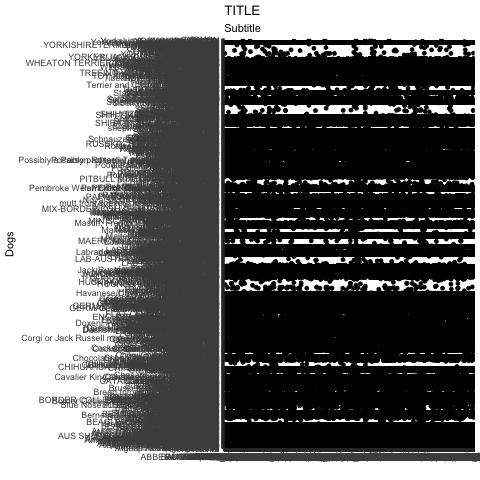

In [50]:
%%R 

ggplot(df) +
    aes(y=BreedName, x=AnimalName) +
    geom_point()+
    ylab("Dogs") +
    xlab("") +
    labs(title="TITLE", subtitle="Subtitle" )
    

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

In [51]:
%%R

install.packages("ggplot2")
install.packages("sf")
install.packages("dplyr")
install.packages("tigris")  # To get ZIP code shapefiles
install.packages("ggthemes")  # For better map themes




The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages

The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages

The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages

The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages

The downloaded binary packages are in
	/var/folders/fd/2_6_clt56hg9lxglbp6447680000gn/T//RtmpUah82J/downloaded_packages


trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/ggplot2_3.5.1.tgz'
Content type 'application/x-gzip' length 4974305 bytes (4.7 MB)
downloaded 4.7 MB

trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/sf_1.0-19.tgz'
Content type 'application/x-gzip' length 29410765 bytes (28.0 MB)
downloaded 28.0 MB

trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/dplyr_1.1.4.tgz'
Content type 'application/x-gzip' length 1599250 bytes (1.5 MB)
downloaded 1.5 MB

trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/tigris_2.1.tgz'
Content type 'application/x-gzip' length 367350 bytes (358 KB)
downloaded 358 KB

trying URL 'https://mirror.las.iastate.edu/CRAN/bin/macosx/big-sur-arm64/contrib/4.4/ggthemes_5.1.0.tgz'
Content type 'application/x-gzip' length 448645 bytes (438 KB)
downloaded 438 KB



In [52]:
%%R

library(ggplot2)
library(sf)
library(dplyr)
library(tigris)  # Provides ZIP code shapefiles
library(ggthemes)


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.


In [53]:
%%R

dog_counts <- df %>%
  group_by(ZipCode) %>%
  summarise(total_dogs = n()) %>%
  mutate(ZipCode = as.character(ZipCode))  # Ensure ZIP codes are characters


In [59]:
%%R

%%R
library(tigris)
library(sf)

# Get ZIP code shapes (only available for 2010)
zip_shapes <- tigris::zctas(cb = TRUE, state = "NY", year = 2010)
zip_shapes <- st_as_sf(zip_shapes)  # Convert to sf object



RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR